In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# SVD from scratch function
def my_svd(A):
    # Step 1: Compute A^T * A
    AtA = np.dot(A.T, A)
    
    # Step 2: Eigen decomposition of A^T * A to get eigenvalues & eigenvectors
    eigenvalues, V = np.linalg.eig(AtA)
    
    # Step 3: Sort eigenvalues and corresponding eigenvectors in decreasing order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]
    
    # Step 4: Take the absolute value of eigenvalues to avoid numerical errors and sqrt
    Sigma = np.sqrt(np.abs(eigenvalues))
    
    # Step 5: Compute U using the formula U = A * V * Sigma^(-1)
    U = np.zeros(A.shape)
    for i in range(len(Sigma)):
        if Sigma[i] != 0:  # avoid division by zero
            U[:, i] = np.dot(A, V[:, i]) / Sigma[i]
    
    return U, Sigma, V.T

## SVD on GrayScale Image

In [3]:
# load gray image
gray = cv2.imread('datasets/SasukeUchiha.jpg', cv2.IMREAD_GRAYSCALE)
gray.shape

(269, 220)

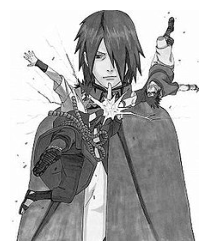

In [4]:
# dispaly gray image
plt.figure(figsize=(5,3))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

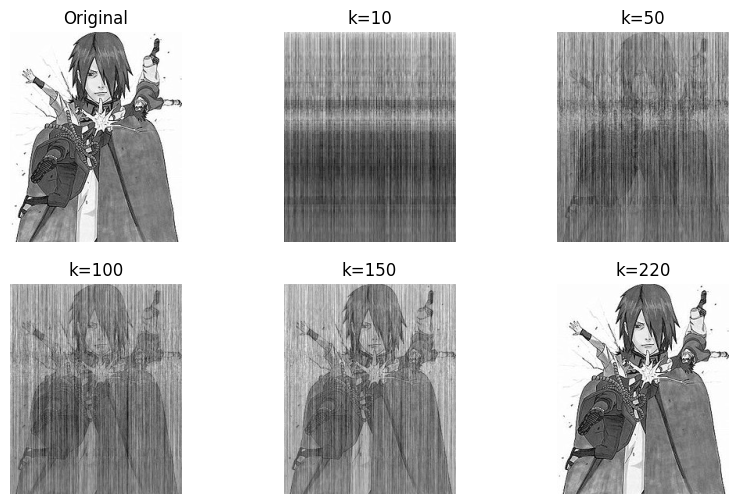

In [5]:
# decompose image using SVD
U, Sigma, Vt = my_svd(gray)
S = np.zeros(U.shape)
np.fill_diagonal(S, Sigma)

# reconstruct image with varying levels of compression
k_values = [10, 50, 100, 150, 220]
l = len(k_values) // 3 + 1

i = 1
plt.figure(figsize=(10,6))
plt.subplot(l, 3, i)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

for k in k_values:
    new_gray = np.dot(U[:, :k], np.dot(S[:k, :k], Vt[:k, :]))    # top k singular values
    
    i += 1
    plt.subplot(l, 3, i)
    plt.imshow(new_gray, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')
plt.show()

## SVD on RGB Image

In [6]:
# load RGB image
rgb = cv2.imread('datasets/SasukeUchiha.jpg')
rgb.shape

(269, 220, 3)

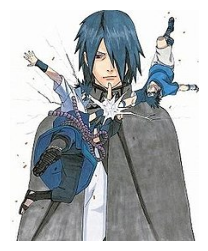

In [7]:
# display RGB image
plt.figure(figsize=(5,3))
plt.imshow(rgb[:,:,::-1])
plt.axis('off')
plt.show()

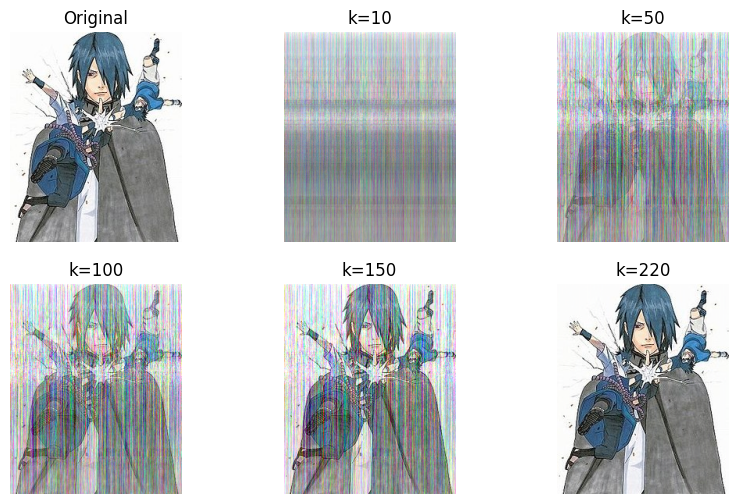

In [8]:
k_values = [10, 50, 100, 150, 220]
l = len(k_values) // 3 + 1

i = 1
plt.figure(figsize=(10,6))
plt.subplot(l, 3, i)
plt.imshow(rgb[:,:,::-1])
plt.title('Original')
plt.axis('off')

for k in k_values:    
    new_channels = []
    # apply SVD on each channel
    for channel in cv2.split(rgb):
        U, Sigma, Vt = my_svd(channel)
        S = np.zeros(U.shape)
        np.fill_diagonal(S, Sigma)
        
        temp = np.dot(U[:, :k], np.dot(S[:k, :k], Vt[:k, :]))    # top k singular values
        temp = np.clip(temp, 0, 255)
        new_channels.append(temp.astype(np.uint8))
    
    # merge the compressed channels back into an RGB image
    new_rgb = cv2.merge(new_channels)
    
    i += 1
    plt.subplot(l, 3, i)
    plt.imshow(new_rgb[:,:,::-1])
    plt.title(f'k={k}')
    plt.axis('off')
plt.show()